In [2]:
%pip install torchvision

# 라이브러리를 불러온다.
import torch 
import torch.nn as nn
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision
import os
import struct
import numpy as np

Note: you may need to restart the kernel to use updated packages.


클래스 레이블: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
훈련 데이터의 크기: 60000
이미지의 크기: torch.Size([1, 28, 28])
레이블: 9


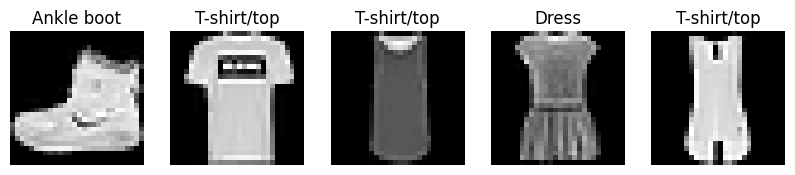

In [4]:
# 여러 이미지 변환을 연결해서 하나의 변환 기능으로 만들어주는 함수
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 텐서로 변환한다.
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# 데이터셋의 클래스 레이블을 확인한다.
classes = train_dataset.classes
print("클래스 레이블:", classes)

# 훈련 데이터의 형태를 확인한다.
print("훈련 데이터의 크기:", len(train_dataset))
image, label = train_dataset[0] 
print("이미지의 크기:", image.size()) #이미지의 크기를 출력한다.
print("레이블:", label) # 이미지의 레이블을 출력한다.

# 이미지 데이터의 형태와 클래스 레이블을 시각적으로 탐색한다.
def show_images(dataset, num_images=5): # 함수를 선언한다.
    plt.figure(figsize=(10, 2)) # 그림의 전체 크기를 설정한다.
    for i in range(num_images): # 반복문 사용
        image, label = dataset[i] # 데이터셋에서 이미지와 레이블을 가져온다.
        plt.subplot(1, num_images, i + 1) # 그림을 여러 개로 나누고 그 중에서 i번째 위치를 선택한다.
        plt.imshow(image.squeeze().numpy(), cmap='gray') # 이미지를 흑백으로 출력한다.
        plt.title(classes[label]) # 이미지의 레이블을 제목으로 설정한다.
        plt.axis('off') # 축을 표시하지 않는다.
    plt.show() # 그림을 출력한다.

# 훈련 데이터에서 일부 이미지를 시각화합니다.
show_images(train_dataset)

In [5]:
# CNN 모델 정의
class SimpleCNN(nn.Module): 
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # 첫 번째 컨볼루션 레이어 정의
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        # 풀링 레이어 정의
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        # 완전 연결 레이어 정의
        self.fc1 = nn.Linear(16 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # 순전파 함수 정의
        x = self.pool(torch.relu(self.conv1(x))) # Convoltion(컨볼루션) -> ReLU -> Pooling(풀링)로 수행하는 순서
        x = x.view(-1, 16 * 14 * 14) # 이미지를 1차원 벡터로 펼친다.
        x = torch.relu(self.fc1(x)) # 첫 번째 완전 연결 레이어를 통과시킨다.
        x = self.fc2(x) # 두 번째 완전 연결 레이어를 통과시킨다.
        return x # x값을 리턴한다.

# FashionMNIST 데이터셋 로드하고 변환을 적용한다.
transform = ToTensor()
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# 데이터 로더 정의
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# nn.CrossEntropyLoss() 손실 함수 정의
criterion = nn.CrossEntropyLoss()

# SimpleCNN() 모델 인스턴스 생성
cnn_model = SimpleCNN()

# 모델 훈련 함수 정의
def train_model(model, train_loader, criterion, lr=0.001, num_epochs=5):
    for epoch in range(num_epochs):
        model.train()  # 모델을 학습 모드로 설정
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            # 순전파
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            # 역전파
            model.zero_grad()
            loss.backward()
            # 매개변수 업데이트
            with torch.no_grad():
                for param in model.parameters():
                    param -= lr * param.grad # 경사 하강법을 사용해 가중치를 업데이트한다.
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        # Epoch마다 손실과 정확도를 출력한다.
        print(f'Epoch {epoch+1}/{num_epochs}, 손실률: {epoch_loss:.4f}, 정확도: {epoch_acc:.2f}%')

# 모델 훈련
train_model(cnn_model, train_loader, criterion, lr=0.001, num_epochs=5)

Epoch 1/5, 손실률: 2.2280, 정확도: 36.99%
Epoch 2/5, 손실률: 1.8837, 정확도: 62.55%
Epoch 3/5, 손실률: 1.2538, 정확도: 67.28%
Epoch 4/5, 손실률: 0.9245, 정확도: 71.43%
Epoch 5/5, 손실률: 0.7886, 정확도: 73.85%


테스트 정확도: 74.10%


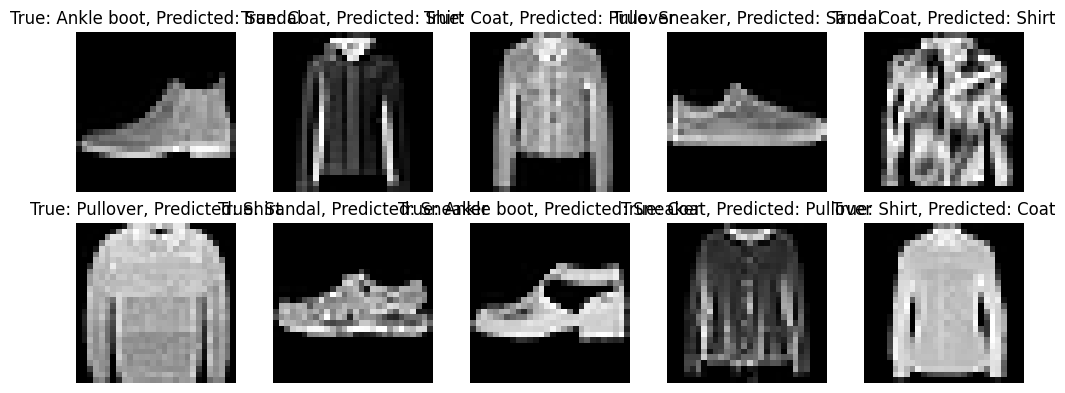

In [6]:
# 모델 성능 평가 함수 정의
def evaluate_model(model, test_loader):
    model.eval()  # 모델을 평가 모드로 설정
    correct = 0 # 올바르게 분류된 총 이미지의 수를 저장하는 변수를 초기화한다.
    total = 0 # 총 이미지의 수를 저장할 변수를 초기화 한다.
    with torch.no_grad(): # 그래디언트 계산을 비활성화하는 컨텍스트 매니저. 해당 연산이 모델의 학습에 영향을 미치지 않고, 인자 업데이트에는 사용되지 않는다는 것을 의미한다. 모델의 성능만 평가.
        for inputs, labels in test_loader: # 테스트 테이터 로더에서 이미지와 레이블을 하나씩 가져온다.
            outputs = model(inputs) # 입력 이미지를 모델에 전달하여 출력을 얻는다.
            _, predicted = torch.max(outputs, 1) # 모델의 출력에서 가장 높은 값을 가진 클래스의 인덱스를 예측 값으로 선택한다.
            total += labels.size(0) # 현재 배치에 포함된 이미지의 수를 총 이미지 수에 더한다.
            correct += (predicted == labels).sum().item() # 정확하게 분류된 이미지의 수를 계산하여 올바르게 분류된 이미지의 총 수에 더한다.
    accuracy = 100 * correct / total # 전체 테스트 데이터에 대한 정확도를 계산한다.
    print(f'테스트 정확도: {accuracy:.2f}%') # 테스트 정확도를 출력한다.
    return accuracy # 계산된 정확도를 반환한다.

# 잘못 분류된 이미지 확인 함수 정의
def analyze_misclassified_images(model, test_loader): # 모델이 잘못 분류한 이미지를 분석하는 함수를 정의한다.
    model.eval()  # 모델을 평가 모드로 설정
    misclassified_images = [] # 잘못 분류된 이미지를 저장할 리스트를 초기화한다.
    with torch.no_grad(): 
        for inputs, labels in test_loader: # 테스트 데이터 로더에서 이미지와 레이블을 하나씩 가져온다.
            outputs = model(inputs) # 입력 이미지를 모델에 전달하여 출력을 얻는다.
            _, predicted = torch.max(outputs, 1) # 모델의 출력에서 가장 높은 값을 가진 클래스의 인덱스를 예측 값으로 선택한다.
            misclassified_images.extend([(img, label.item(), predicted_item.item()) for img, label, predicted_item in zip(inputs, labels, predicted) if label != predicted_item])
            # 잘못 분류된 이미지를 리스트에 추가한다. 올바른 레이블과 예측된 레이블이 다른 경우에만 추가된다.
    return misclassified_images # 잘못 분류된 이미지를 담은 리스트를 반환한다.

# 모델 평가
test_accuracy = evaluate_model(cnn_model, test_loader)

# 잘못 분류된 이미지 분석하여 저장한다.
misclassified_images = analyze_misclassified_images(cnn_model, test_loader)

# 잘못 분류된 이미지 시각화하는 함수를 정의한다.
def show_misclassified_images(misclassified_images, classes):
    plt.figure(figsize=(10, 4)) # 그래프이 크기를 설정한다.
    num_images = min(len(misclassified_images), 10) # 시각화할 이미지의 최대 개수를 10개로 설정한다.
    for i in range(num_images): # 시각화할 이미지의 개수만큼 반복한다.
        image, true_label, predicted_label = misclassified_images[i] # 잘못 분류된 이미지, 실제 레이블, 예측된 레이블을 가져온다.
        plt.subplot(2, 5, i + 1)
        plt.imshow(image.squeeze().numpy(), cmap='gray') # 이미지를 흑백으로 시각화한다.
        plt.title(f'True: {classes[true_label]}, Predicted: {classes[predicted_label]}') # 이미지의 제목에 실제 레이블과 예측된 레이블을 표시한다.
        plt.axis('off') # 축을 표시하지 않는다.
    plt.tight_layout() # 그래프의 레이아웃을 조정한다.
    plt.show() # 잘못 분류된 이미지를 시각화 한다.

# 잘못 분류된 이미지 시각화
show_misclassified_images(misclassified_images, train_dataset.classes)


가장 많이 잘못 분류된 클래스: Shirt (703 misclassifications)


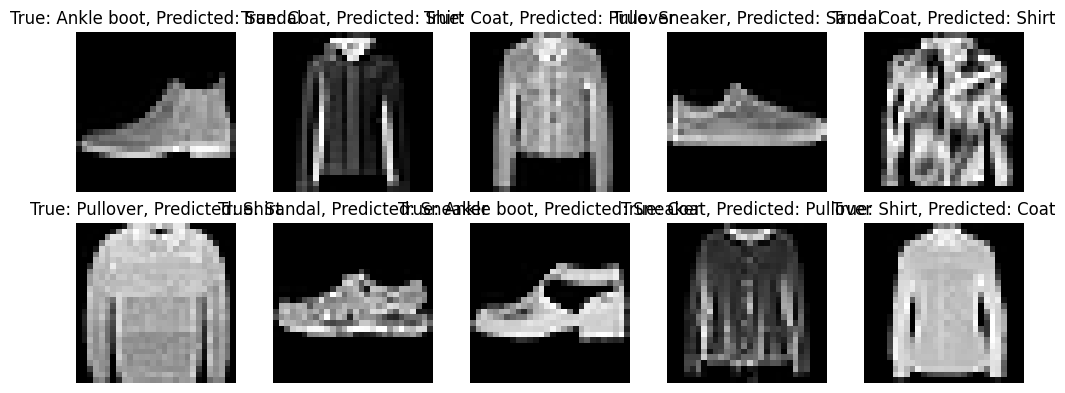

In [7]:
# 잘못 분류된 이미지 분석 함수의 정의
def analyze_misclassified_images(model, test_loader):
    model.eval()  # 모델을 평가 모드로 설정하여 드롭아웃 레이어 등이 비활성화 된다.
    misclassified_images = [] # 잘못 분류된 이미지를 저장할 리스트를 초기화한다.
    misclassified_counts = {class_name: 0 for class_name in train_dataset.classes}  # 각 클래스별로 잘못 분류된 횟수를 기록하기 위한 딕셔너리 초기화
    with torch.no_grad(): # 기울기 계산 비활성화
        for inputs, labels in test_loader: # 데스트 데이터셋을 반복하여 이미지와 레이블을 가져온다.
            outputs = model(inputs) # 모델을 통해 입력 이비지를 전달하여 예측 수행한다.
            _, predicted = torch.max(outputs, 1) # 모델의 출력에서 최대 값과 해당 인덱스를 가져와 예측된 클래스를 결정
            for img, label, predicted_item in zip(inputs, labels, predicted): # 각 이미지, 실제 레이블, 예측된 레이블에 대해 반복한다.
                if label != predicted_item: # 실제 레이블과 예측된 레이블이 다른 경우
                    misclassified_images.append((img, label.item(), predicted_item.item())) # 잘못 분류된 이미지를 리스트에 추가한다.
                    true_class = train_dataset.classes[label.item()] # 실제 클래스의 이름을 가져온다.
                    misclassified_counts[true_class] += 1 # 해당 클래스의 잘못 분류된 횟수를 증가
    return misclassified_images, misclassified_counts # 잘못 분류된 이미지와 각 클래스의 잘못 분류된 횟수를 반환한다.

# 잘못 분류된 이미지 분석 및 클래스별 횟수 카운트
misclassified_images, misclassified_counts = analyze_misclassified_images(cnn_model, test_loader)

# 가장 많이 잘못 분류된 클래스 출력
most_misclassified_class = max(misclassified_counts, key=misclassified_counts.get)
print(f"가장 많이 잘못 분류된 클래스: {most_misclassified_class} ({misclassified_counts[most_misclassified_class]} misclassifications)")

# 잘못 분류된 이미지 시각화
show_misclassified_images(misclassified_images, train_dataset.classes) 